In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy.stats import mannwhitneyu
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(dpi_save=650)
mpl.rcParams.update({"axes.grid" : False})

In [2]:
adata = sc.read_h5ad("./adatas/crmulti_gex_tcells.h5ad")
adata

AnnData object with n_obs × n_vars = 68502 × 22279
    obs: 'sample', 'age', 'treatment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pl', 'mv', 'Tcell_score', 'Treg_score', 'Th1_score', 'Inhibitory_score', 'Cytokines_score', 'Cytotoxicity_score', 'Memory_score', 'TFs_score', 'leiden', 'leid_samp', 'pl_new', 'mv_new', 'leiden_based_cts', 'mouse', 'Sample', 'age_cell'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'dendrogram_leiden', 'leiden', 'leiden_based_cts_colors', 'leiden_colors', 'log1p', 'mv_colors', 'mv_new_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'X_umap_old'
    varm: 'PCs'
    layers: 'counts', 'lognormcounts', 'normcounts'
    obsp: 'connectivities', 'distances'

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


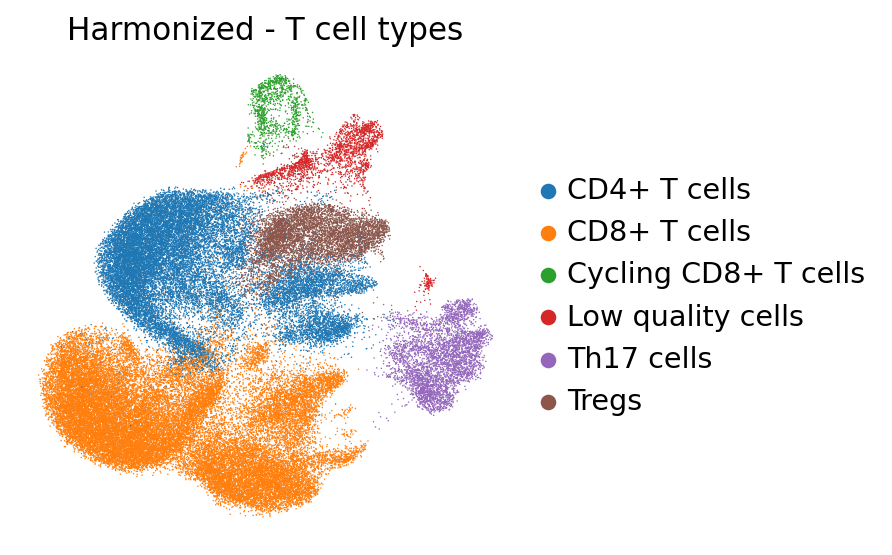

In [3]:
sc.set_figure_params(dpi_save=650)
sc.pl.umap(adata, color='leiden_based_cts', frameon=False, title='Harmonized - T cell types',save='figa1.png')

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


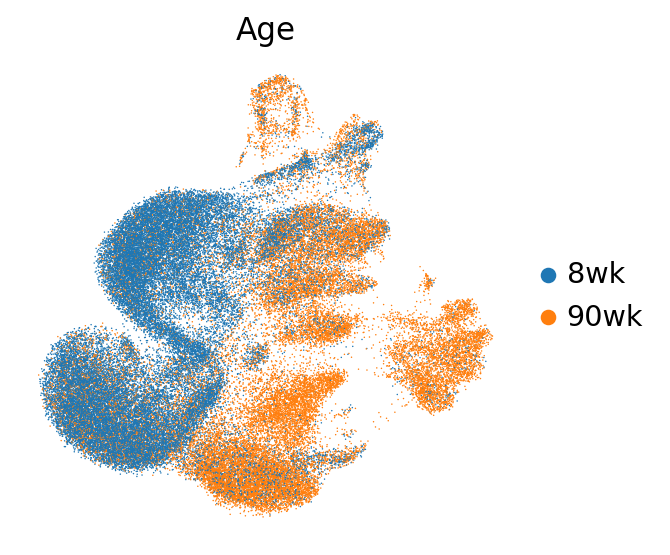

In [4]:
sc.set_figure_params(dpi_save=650)
sc.pl.umap(adata, color='age', frameon=False, title='Age',save='figa2.png')

# Dania

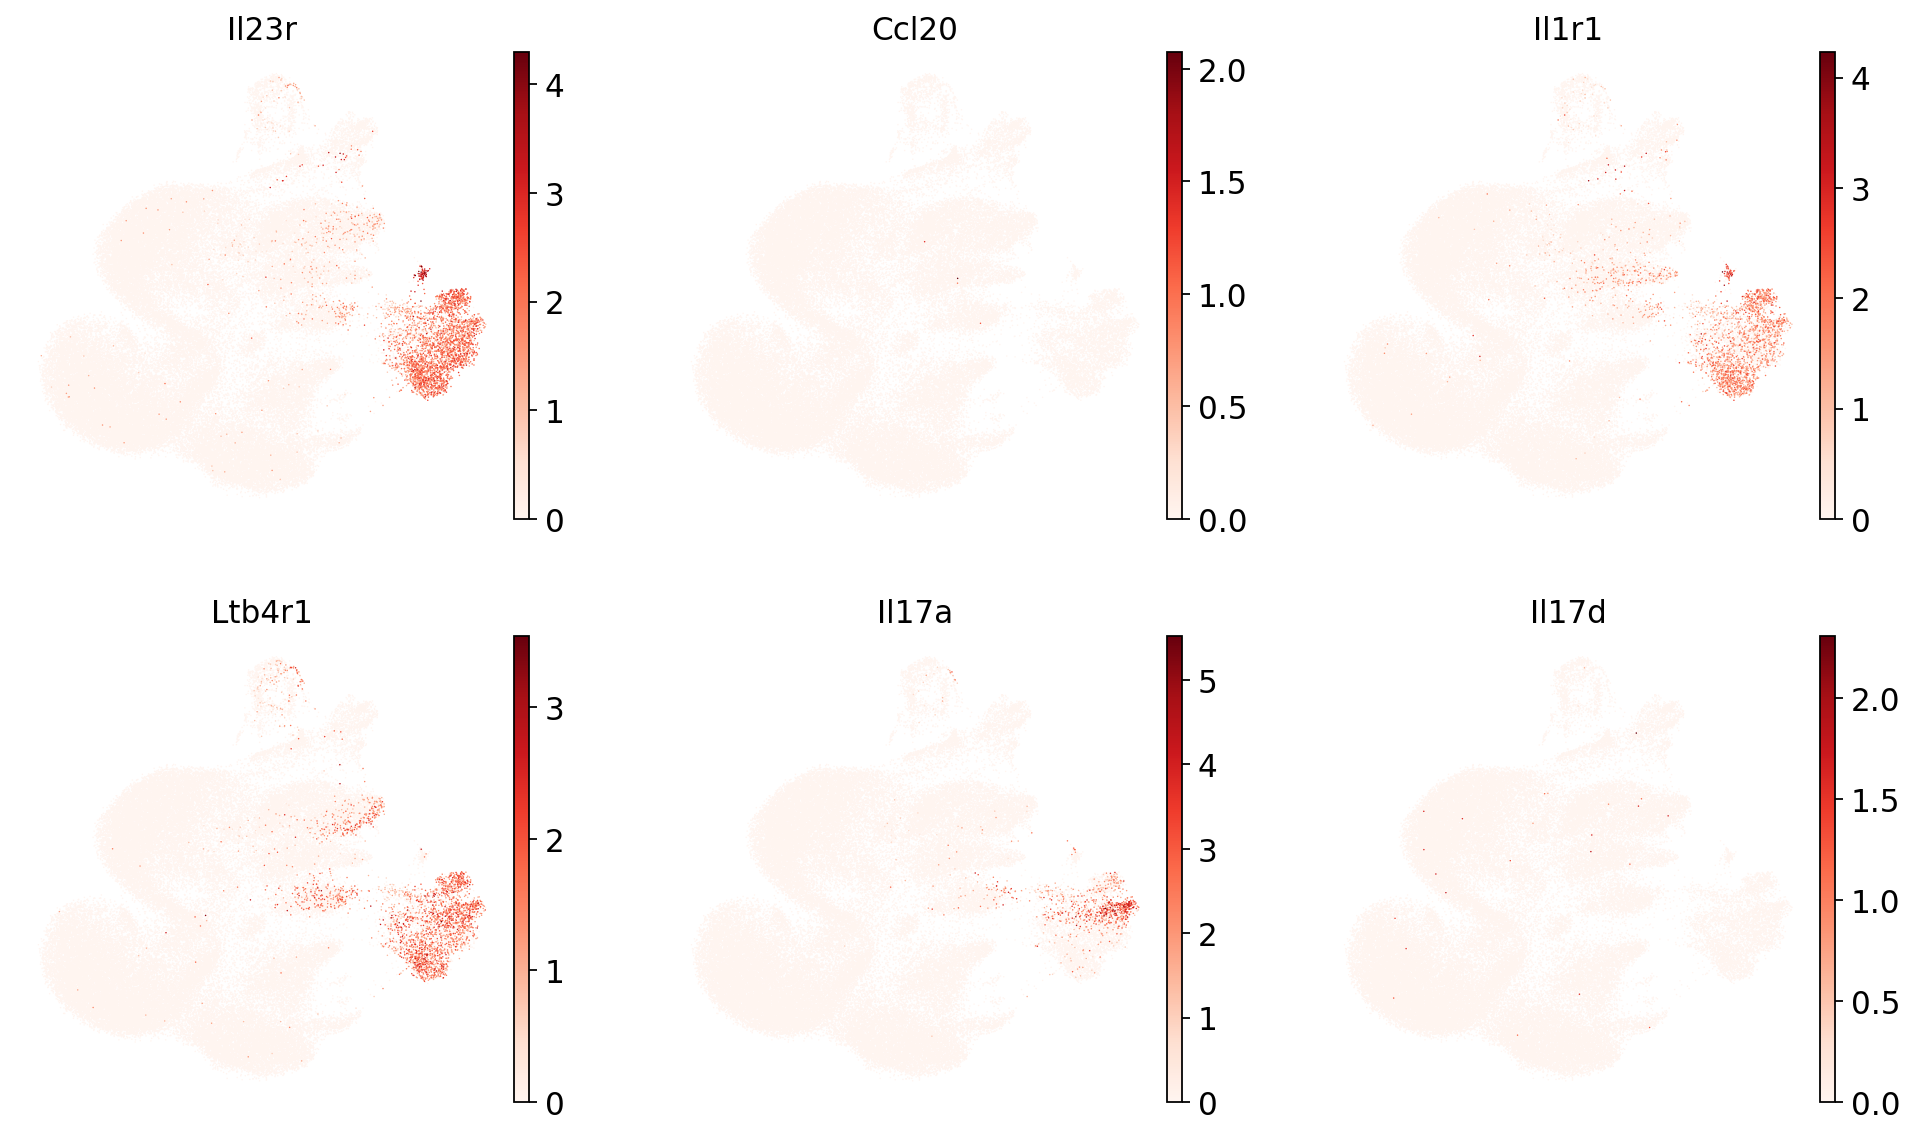

In [5]:
# Plot of Th17 marker genes
sc.pl.umap(adata, color=['Il23r','Ccl20','Il1r1','Ltb4r1','Il17a','Il17d'], ncols=3, frameon=False, cmap='Reds') #bwr

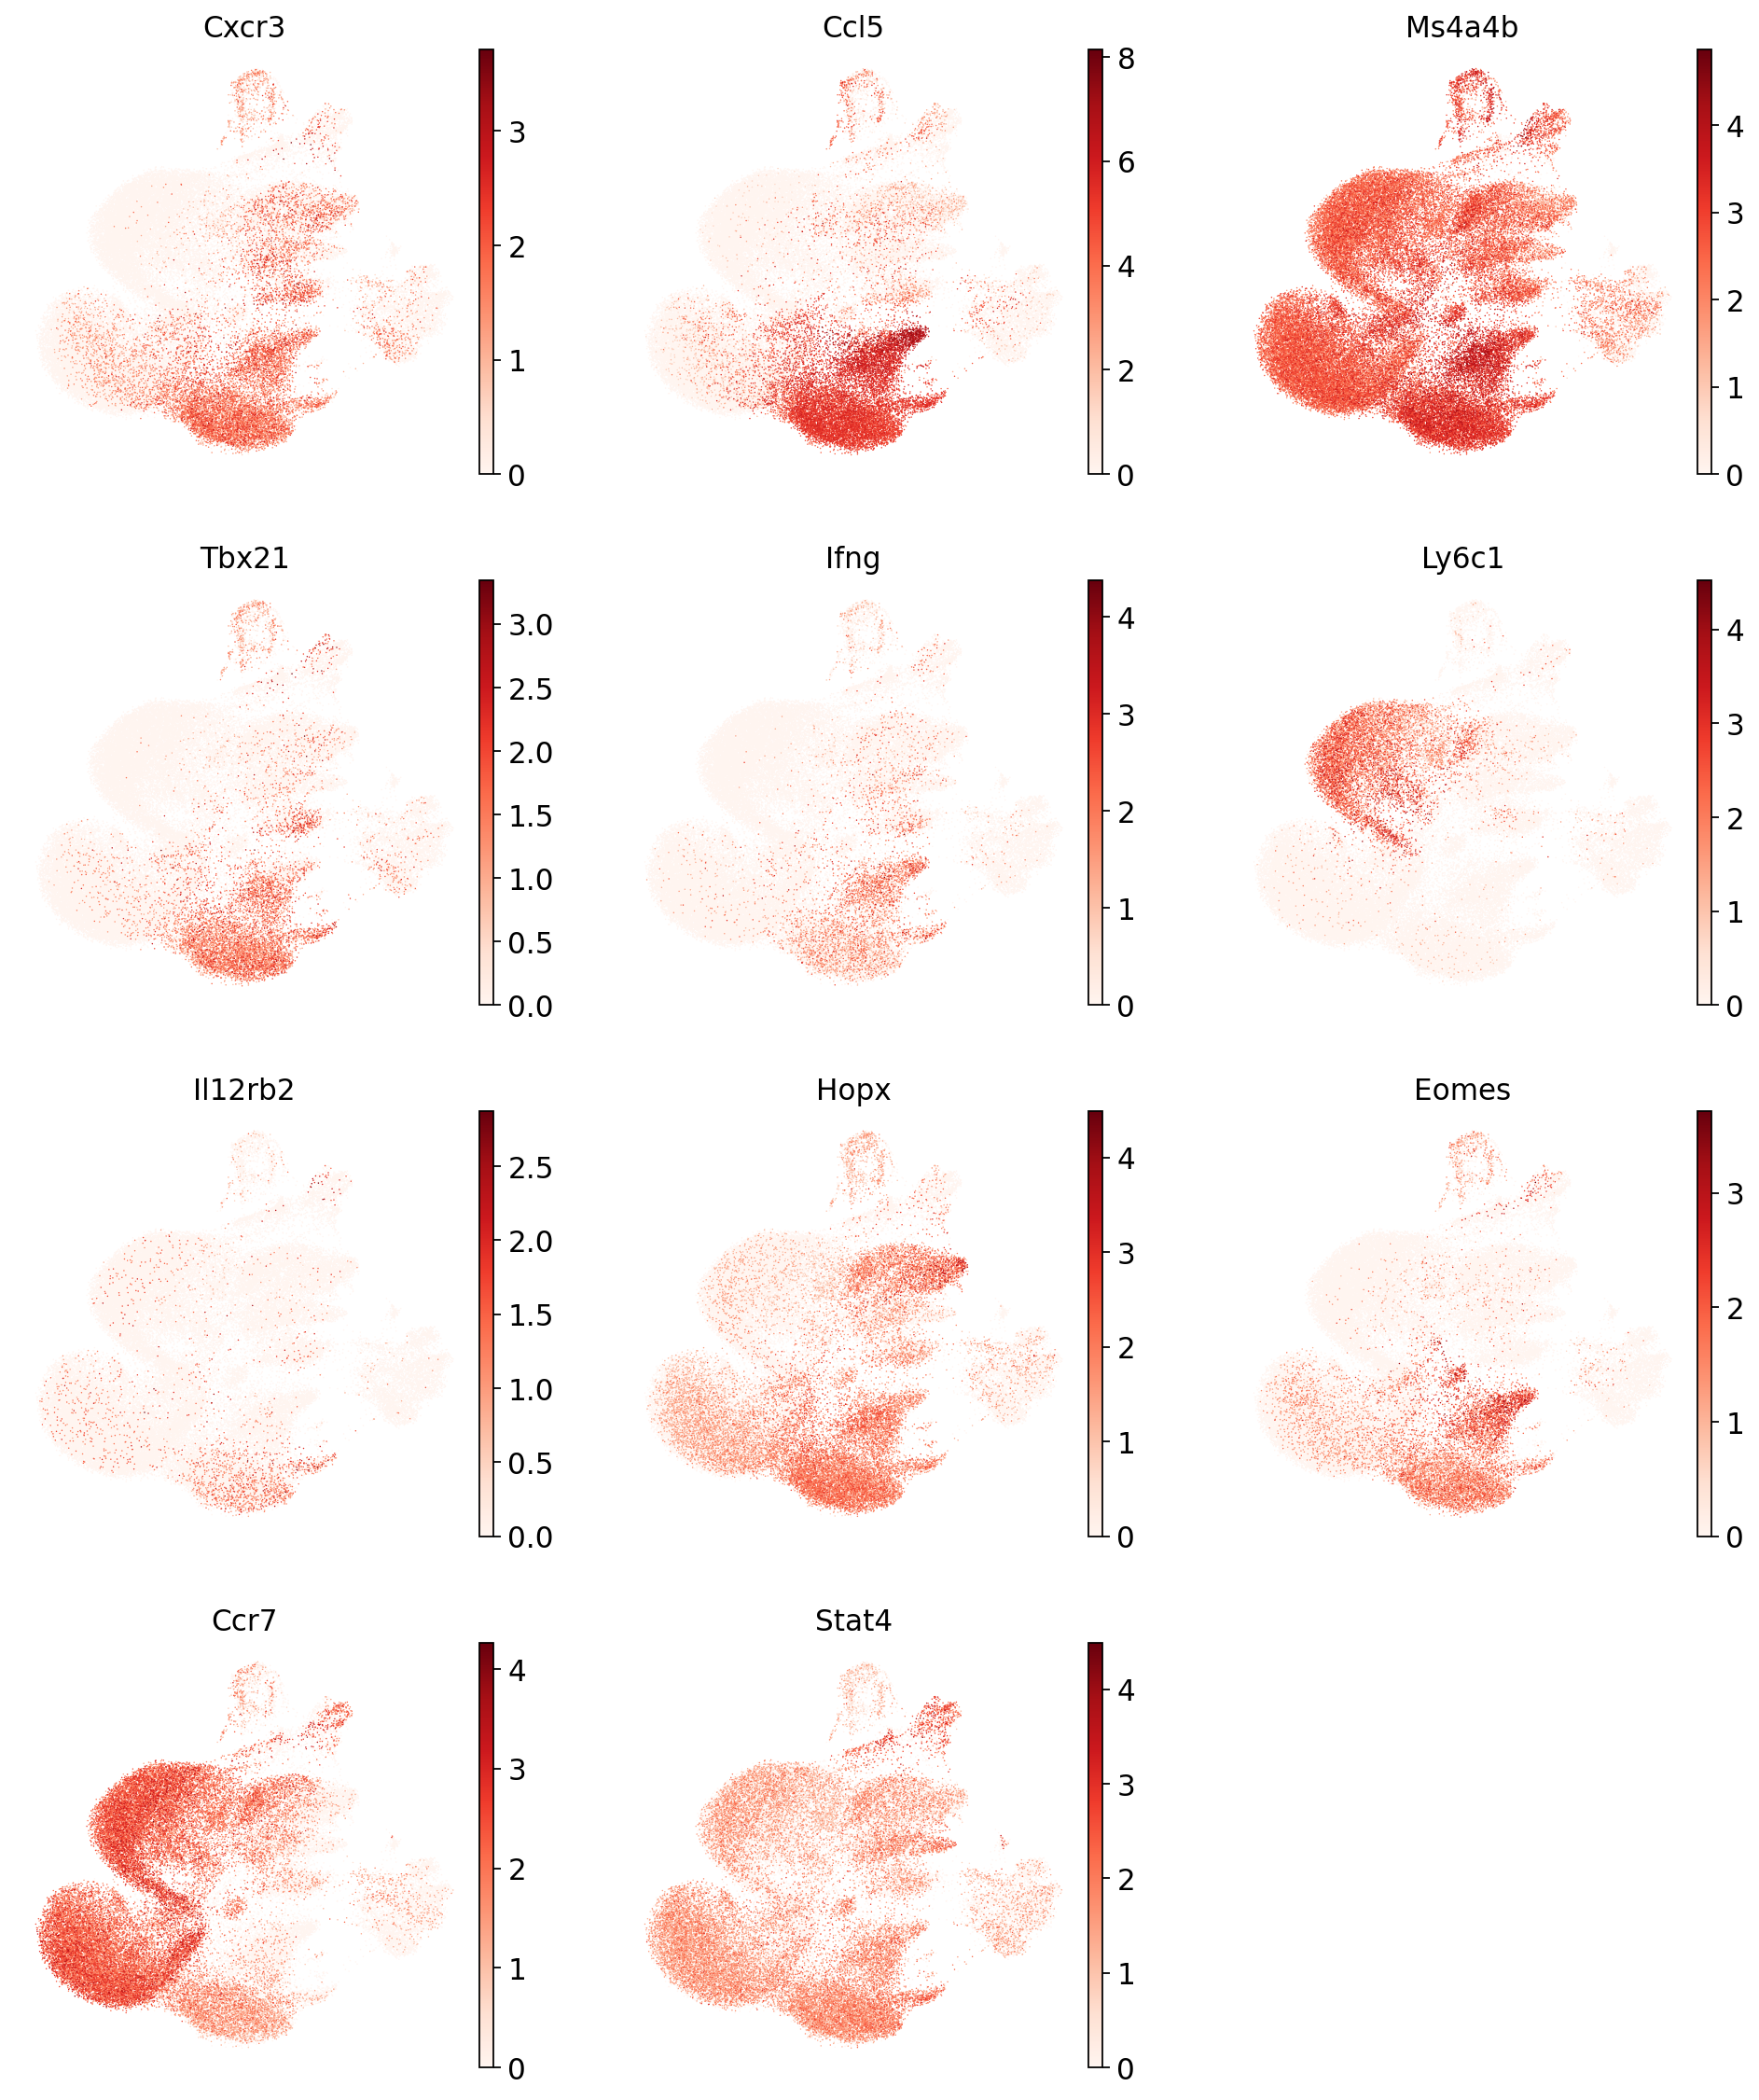

In [6]:
sc.pl.umap(adata, color=['Cxcr3','Ccl5','Ms4a4b','Tbx21','Ifng','Ly6c1','Il12rb2','Hopx','Eomes', 'Ccr7', 'Stat4'], ncols=3, frameon=False, cmap='Reds') #bwr

In [7]:
state_genes = pd.read_csv('./tcellstate_genes.csv')

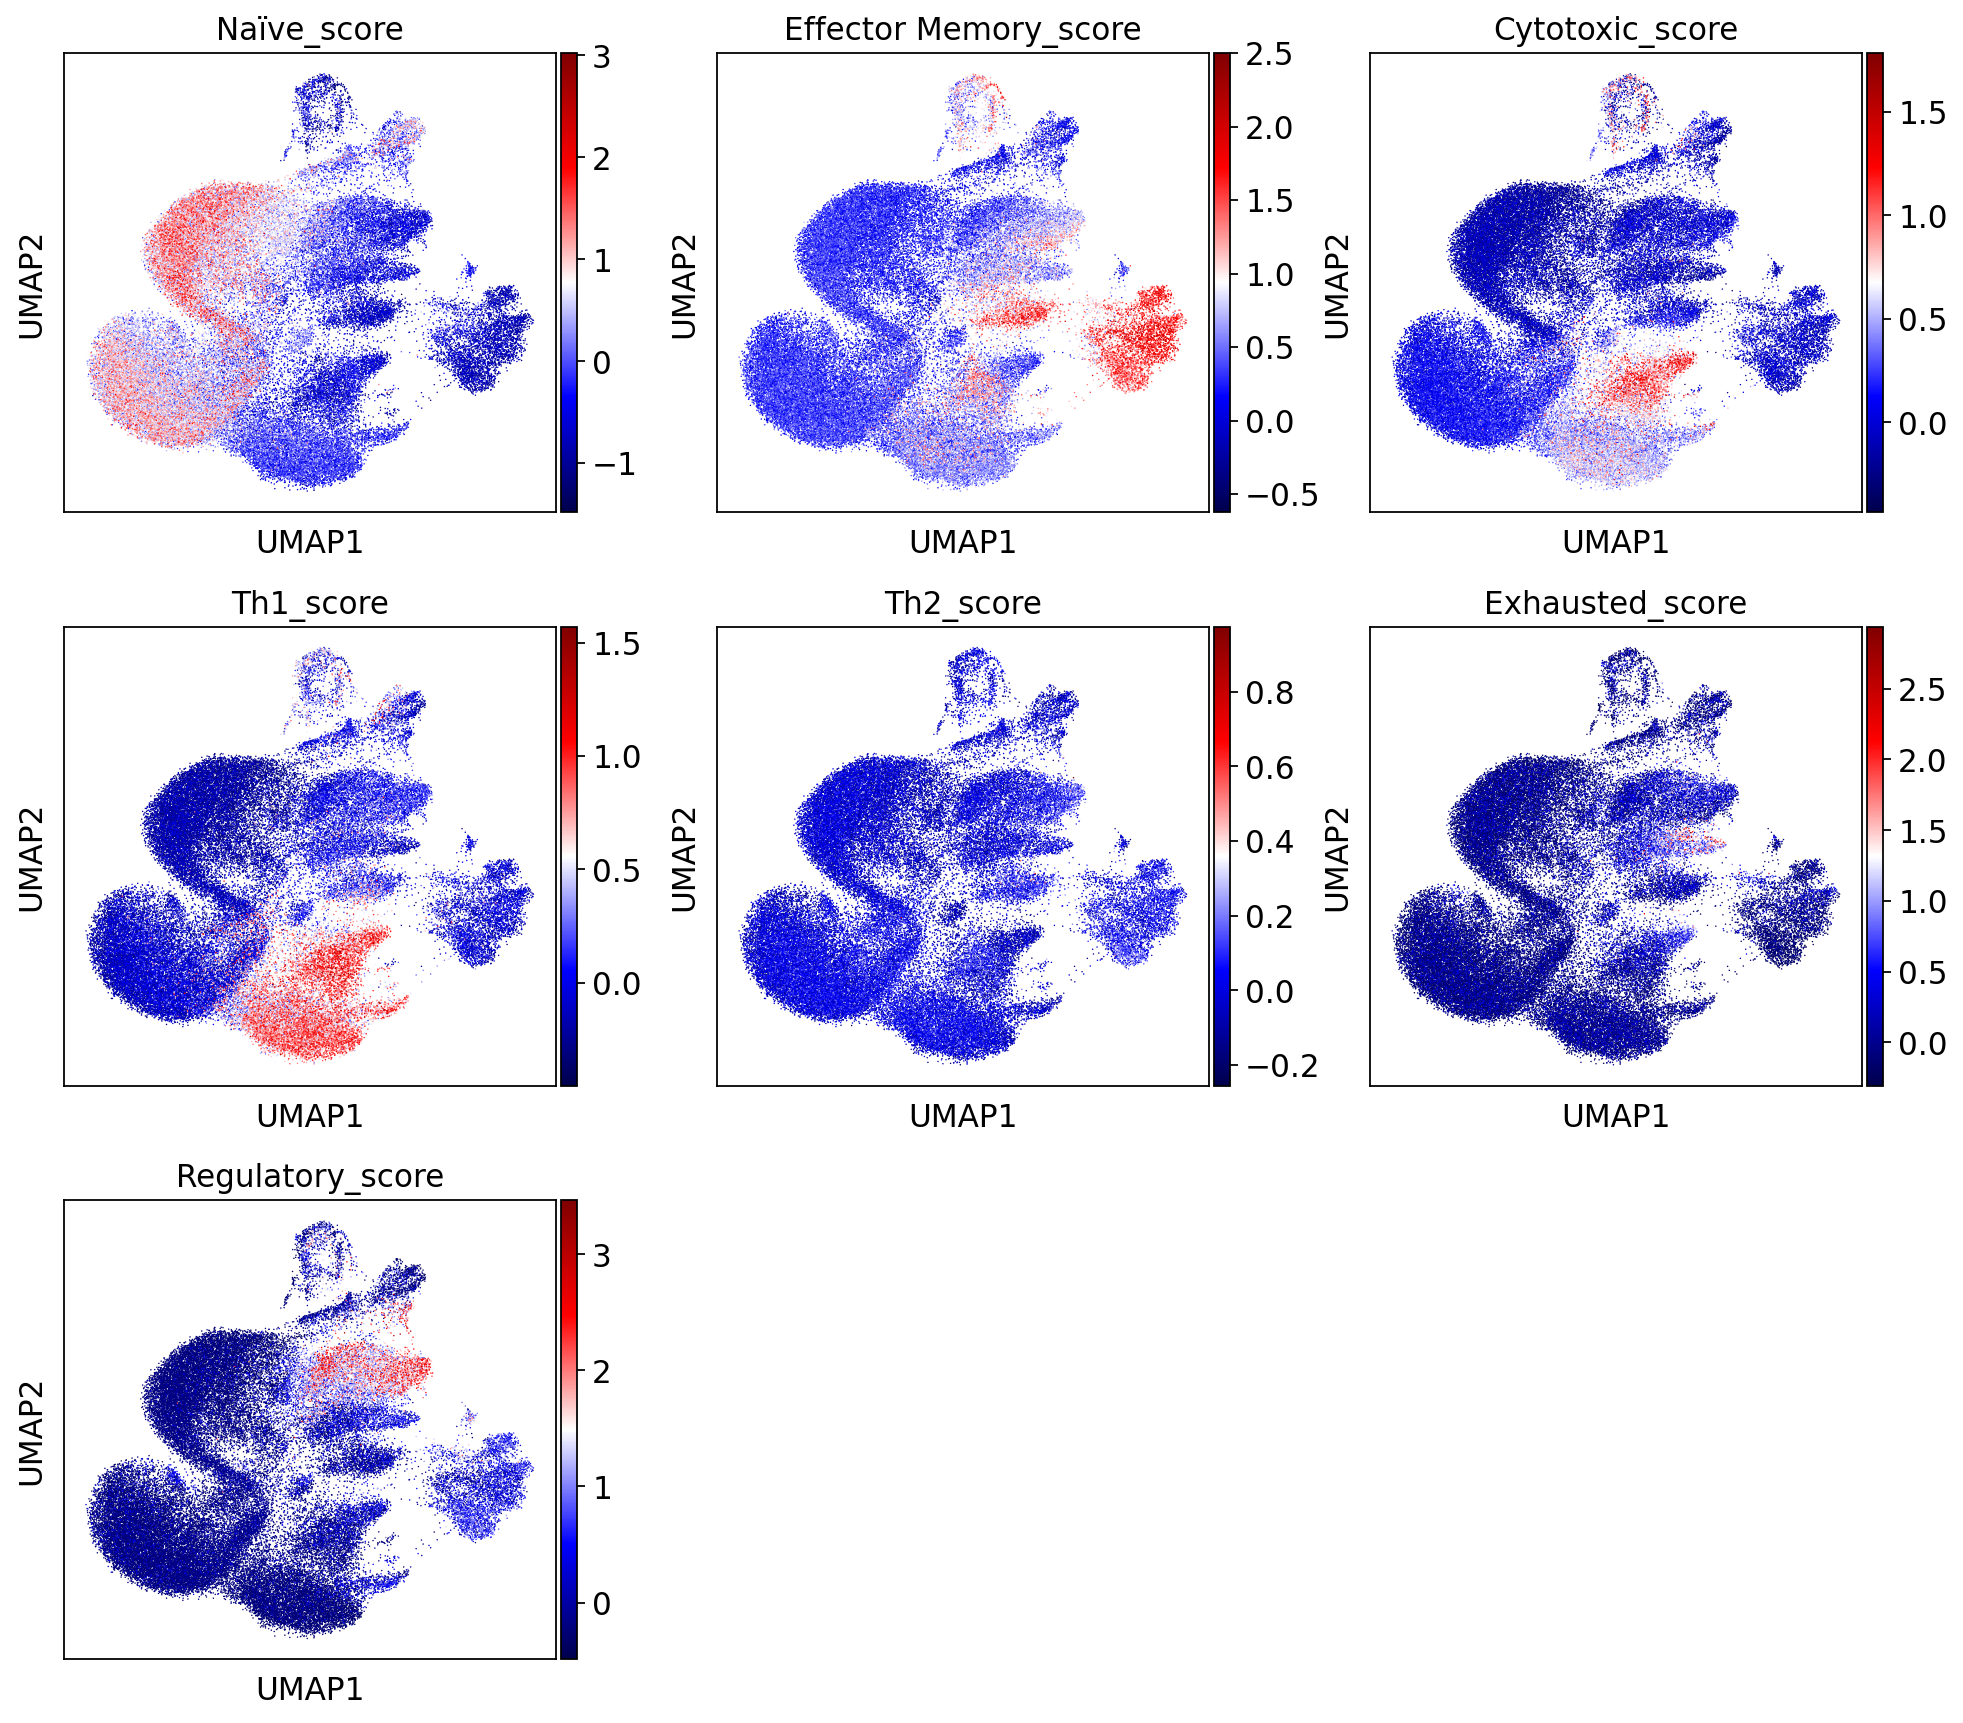

In [8]:
scorenames = []
for i in state_genes.columns:
    name = str(i)+"_score"
    sc.tl.score_genes(adata, state_genes[i].dropna().tolist(), ctrl_size=50, n_bins=25, score_name=name, random_state=23)
    scorenames.append(name)
# scorenames=['Naïve_score','Effector-memory_score','Activated_Elderly_score','']
sc.pl.umap(adata, color=scorenames, ncols=3,cmap="seismic") #bwr

In [9]:
adata.obs['leiden_based_cts'].value_counts()

CD8+ T cells            33534
CD4+ T cells            21910
Tregs                    5702
Th17 cells               4175
Low quality cells        2091
Cycling CD8+ T cells     1090
Name: leiden_based_cts, dtype: int64

## Cd4+ : Ova+LPS+PGPC

In [16]:
from scipy.stats import mannwhitneyu

temp = adata[adata.obs['leiden_based_cts']=='CD4+ T cells']
temp = temp[temp.obs['treatment']=='OVAposLPSposPGPC']
young = temp[temp.obs['age']=='8wk']
old = temp[temp.obs['age']=='90wk']

statistical_test = []
for i in scorenames:
    res = mannwhitneyu(old.obs[i], young.obs[i], alternative='two-sided')
    statistical_test.append({'Score':i,
                            'test-statistic':res.statistic,
                            'p-value':res.pvalue})
statistical_test = pd.DataFrame(statistical_test)
statistical_test

Score  test-statistic        p-value
0            Naïve_score       1387351.0  1.222653e-243
1  Effector Memory_score       4962248.0  1.351884e-214
2        Cytotoxic_score       3941116.0   1.376633e-37
3              Th1_score       4767823.0  1.618542e-169
4              Th2_score       3474073.0   1.220928e-05
5        Exhausted_score       4752766.0  2.997484e-166
6       Regulatory_score       4218082.0   5.077472e-71

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


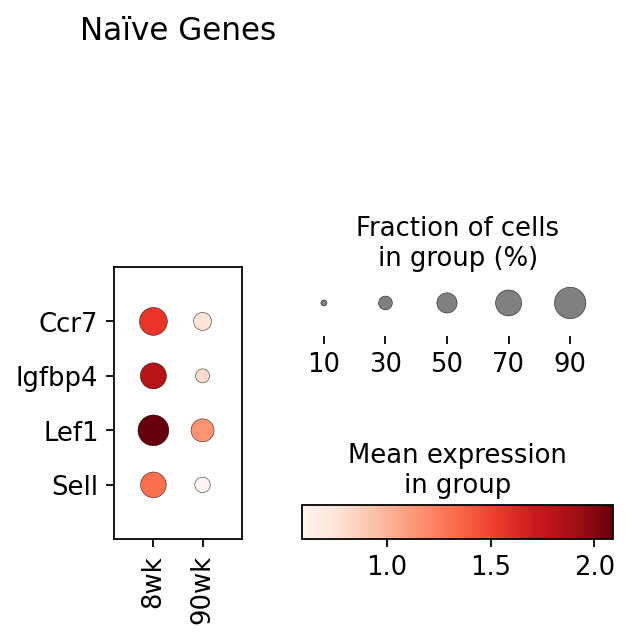

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


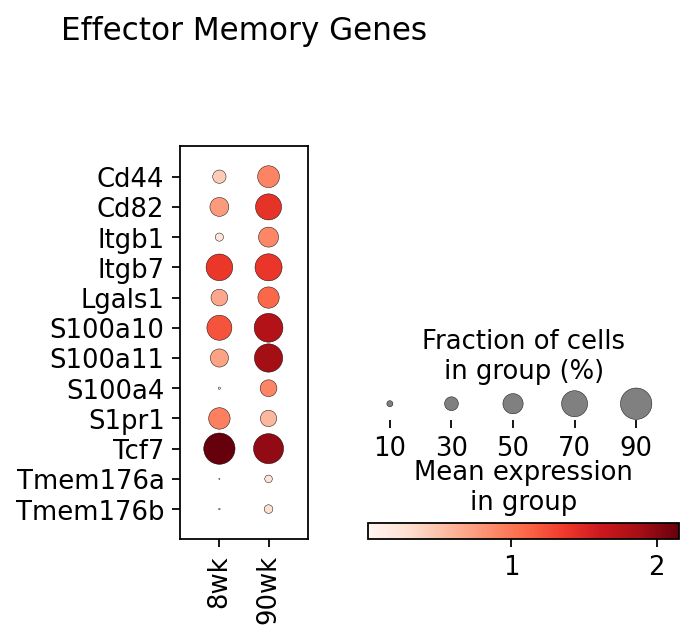

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


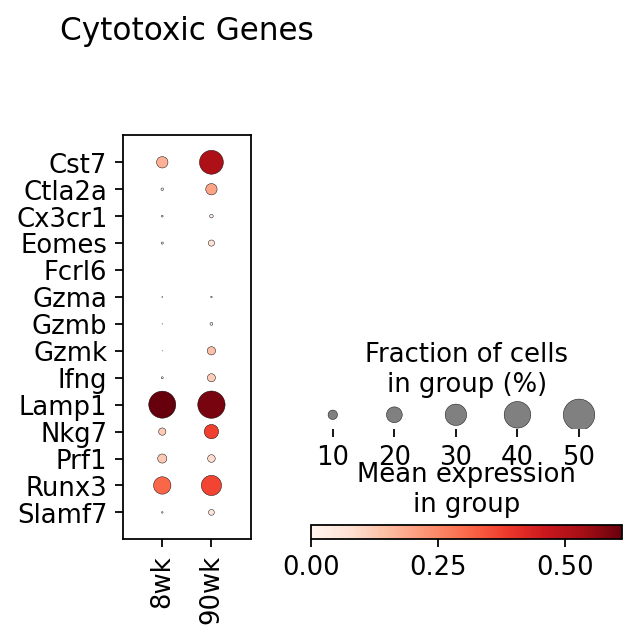

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


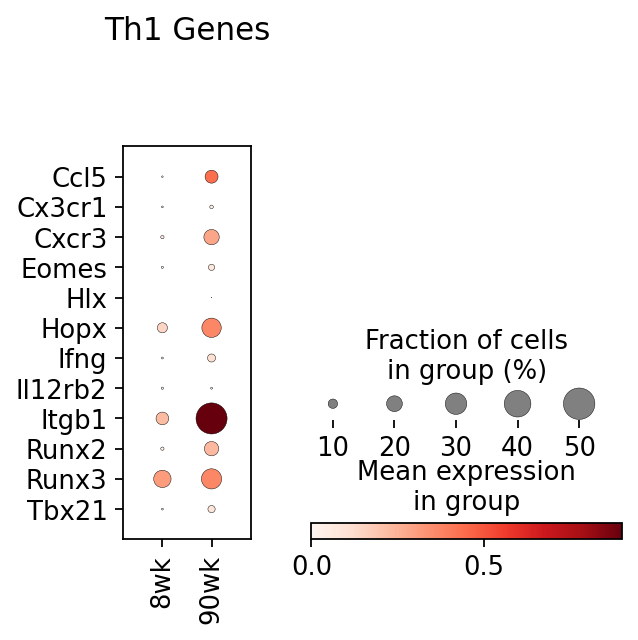

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


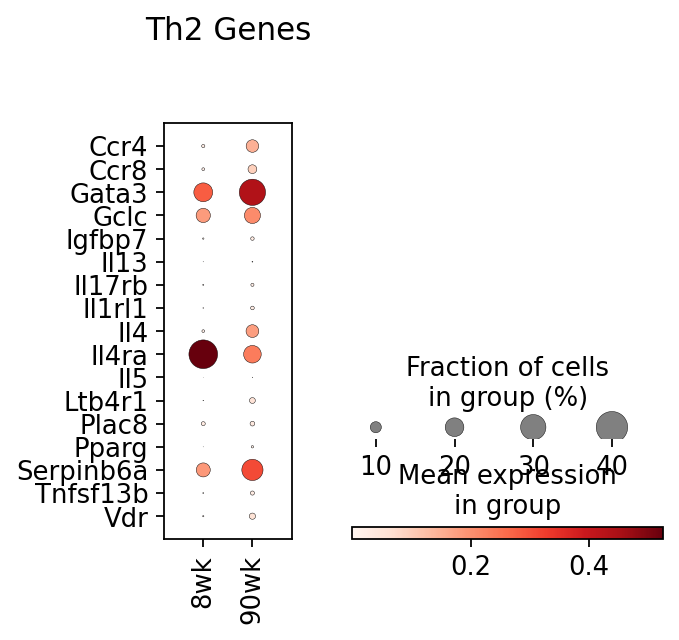

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


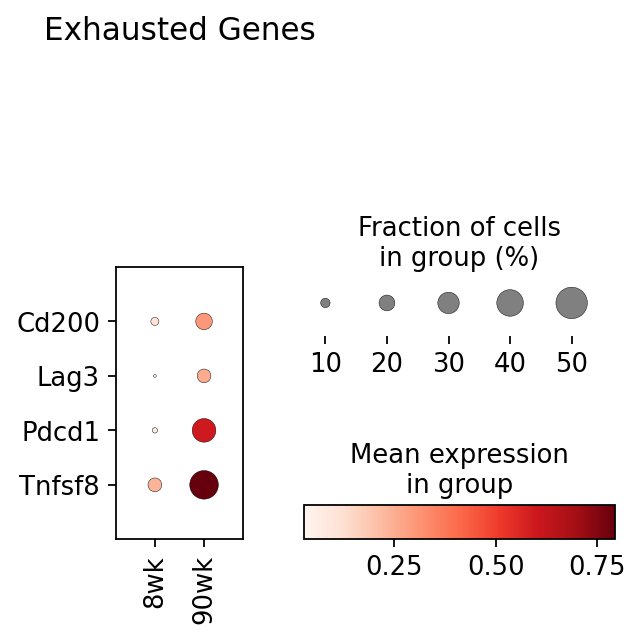

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


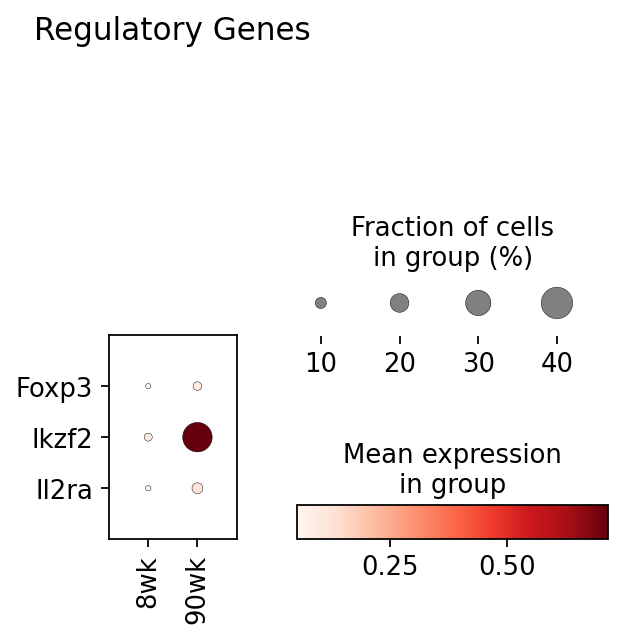

In [17]:
sc.set_figure_params(dpi_save = 600)
plt.rc('legend', fontsize=9)    # legend fontsize

adata = sc.read_h5ad("./adatas/crmulti_gex_tcells.h5ad")
temp = adata[adata.obs['leiden_based_cts']=='CD4+ T cells']
temp = temp[temp.obs['treatment']=='OVAposLPSposPGPC']
df = pd.read_csv('tcellstate_genes.csv')
for i in df.columns:
    fig,ax = plt.subplots()
    genes = df[i].tolist()
    genes = [i for i in genes if str(i)!='nan']
    dp = sc.pl.dotplot(temp, np.unique(genes), groupby='age',cmap='Reds',return_fig=True,ax=ax,
                       swap_axes=True, dendrogram=False, title="{} Genes".format(i), layer='lognormcounts')
    dp.legend(width=1.8).show()
    fig.savefig('./figures/dotplot_{}_genes.pdf'.format(i),dpi=650)

/home/pjoshua/miniconda3/envs/scanpy-env/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


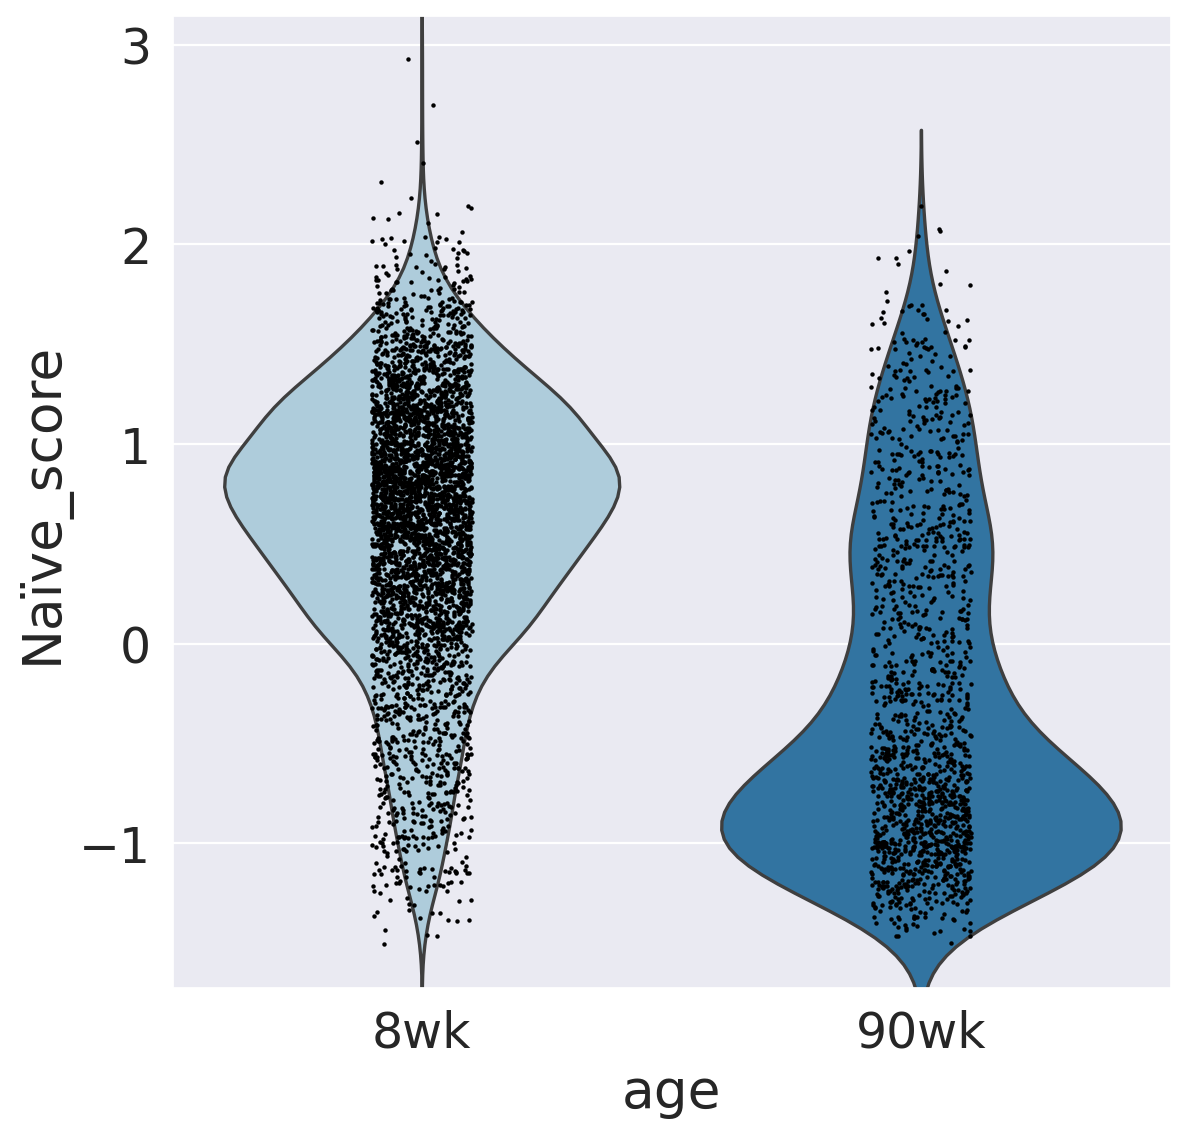

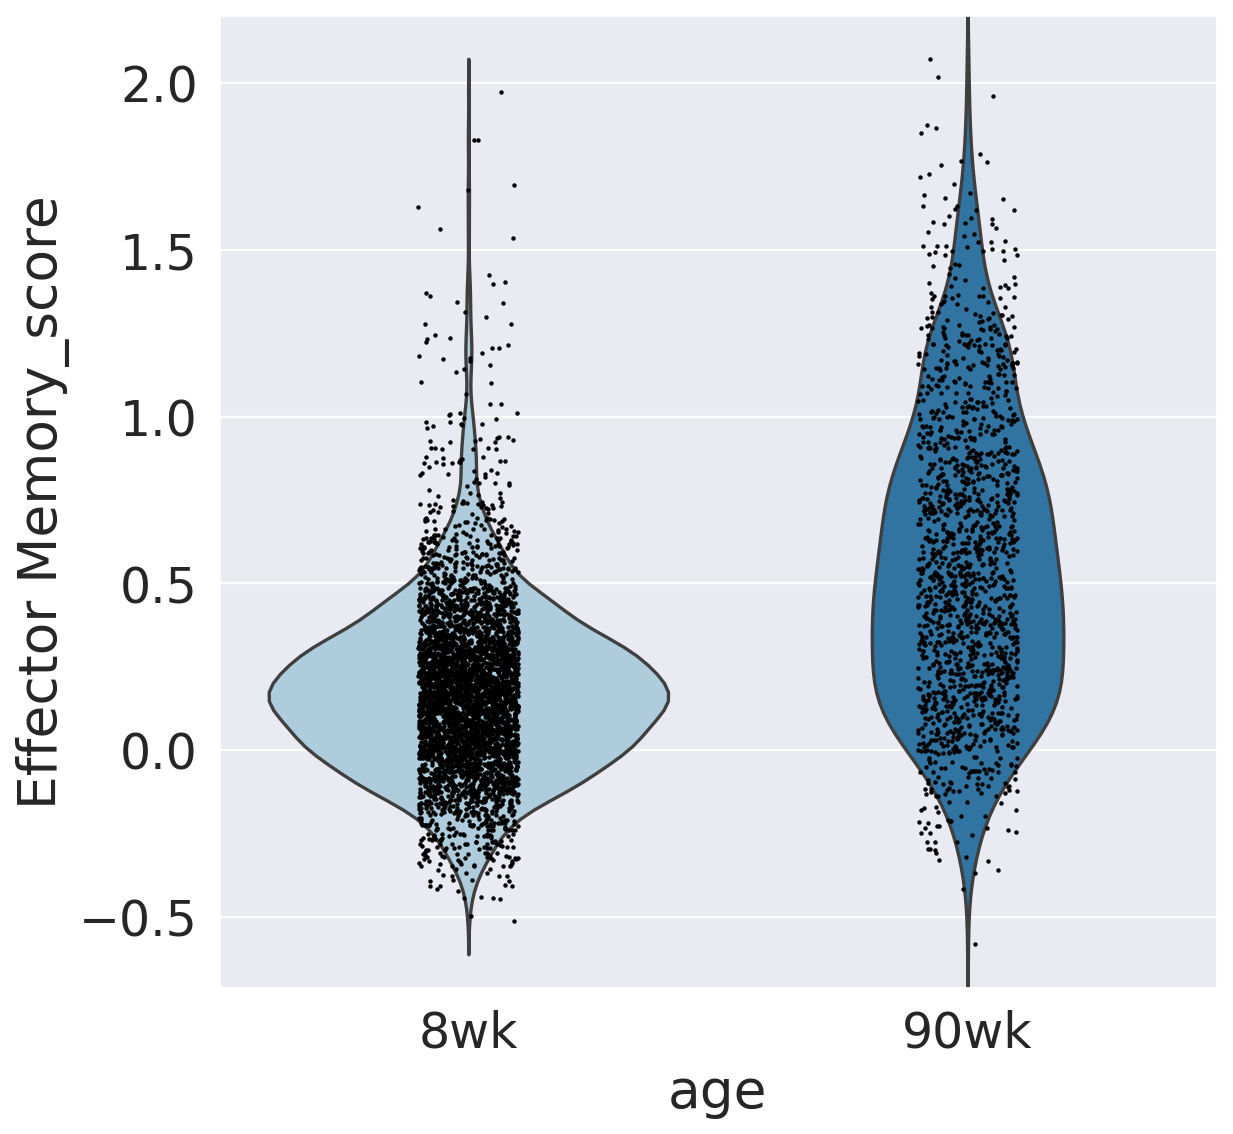

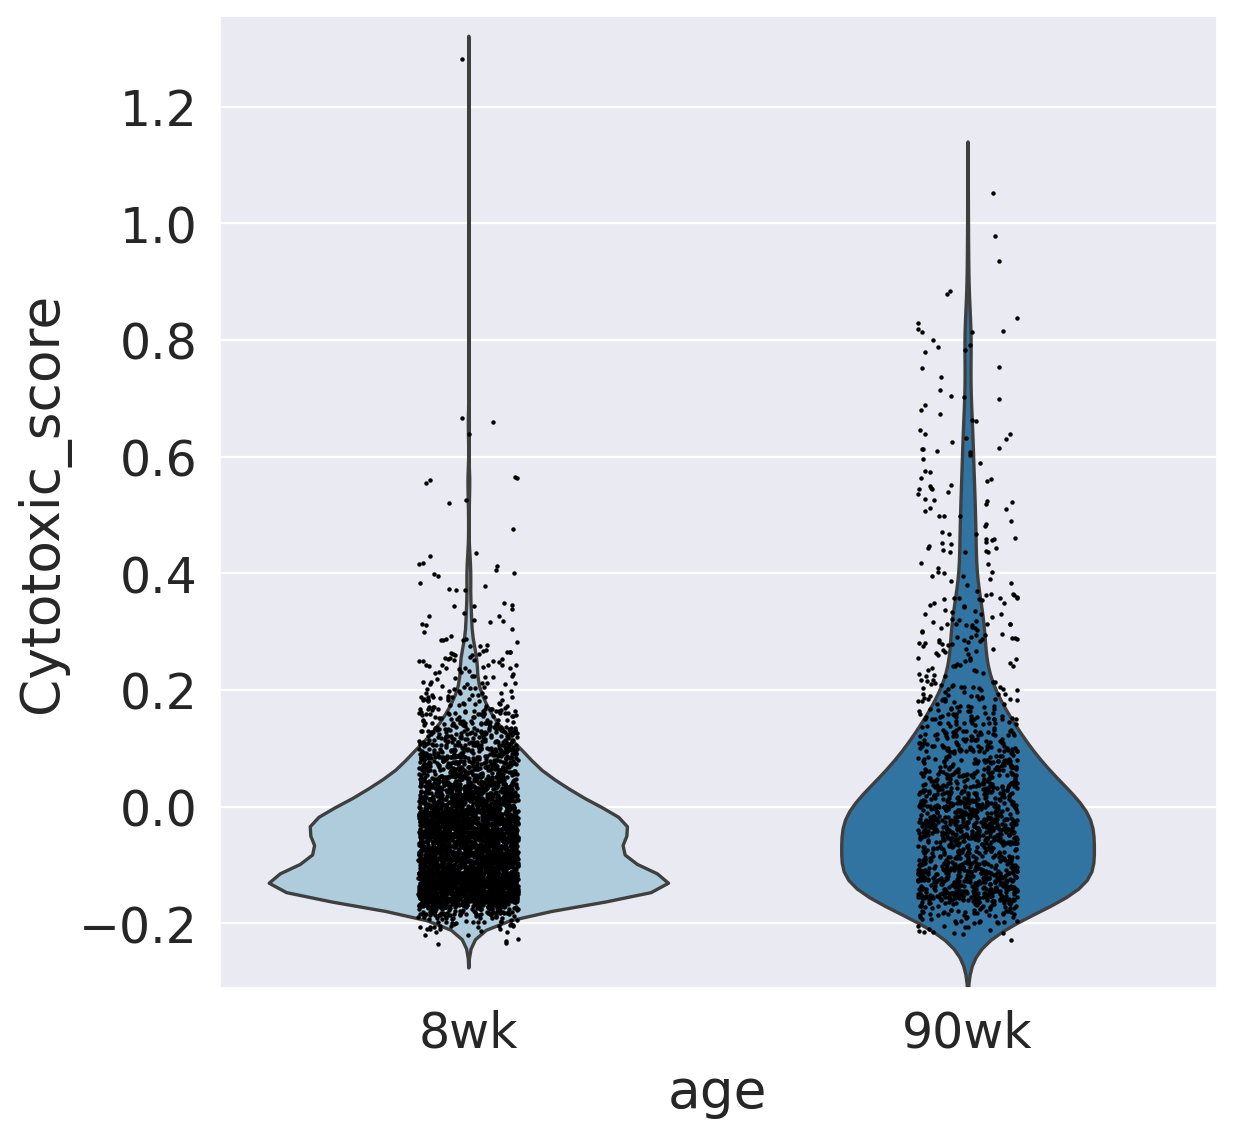

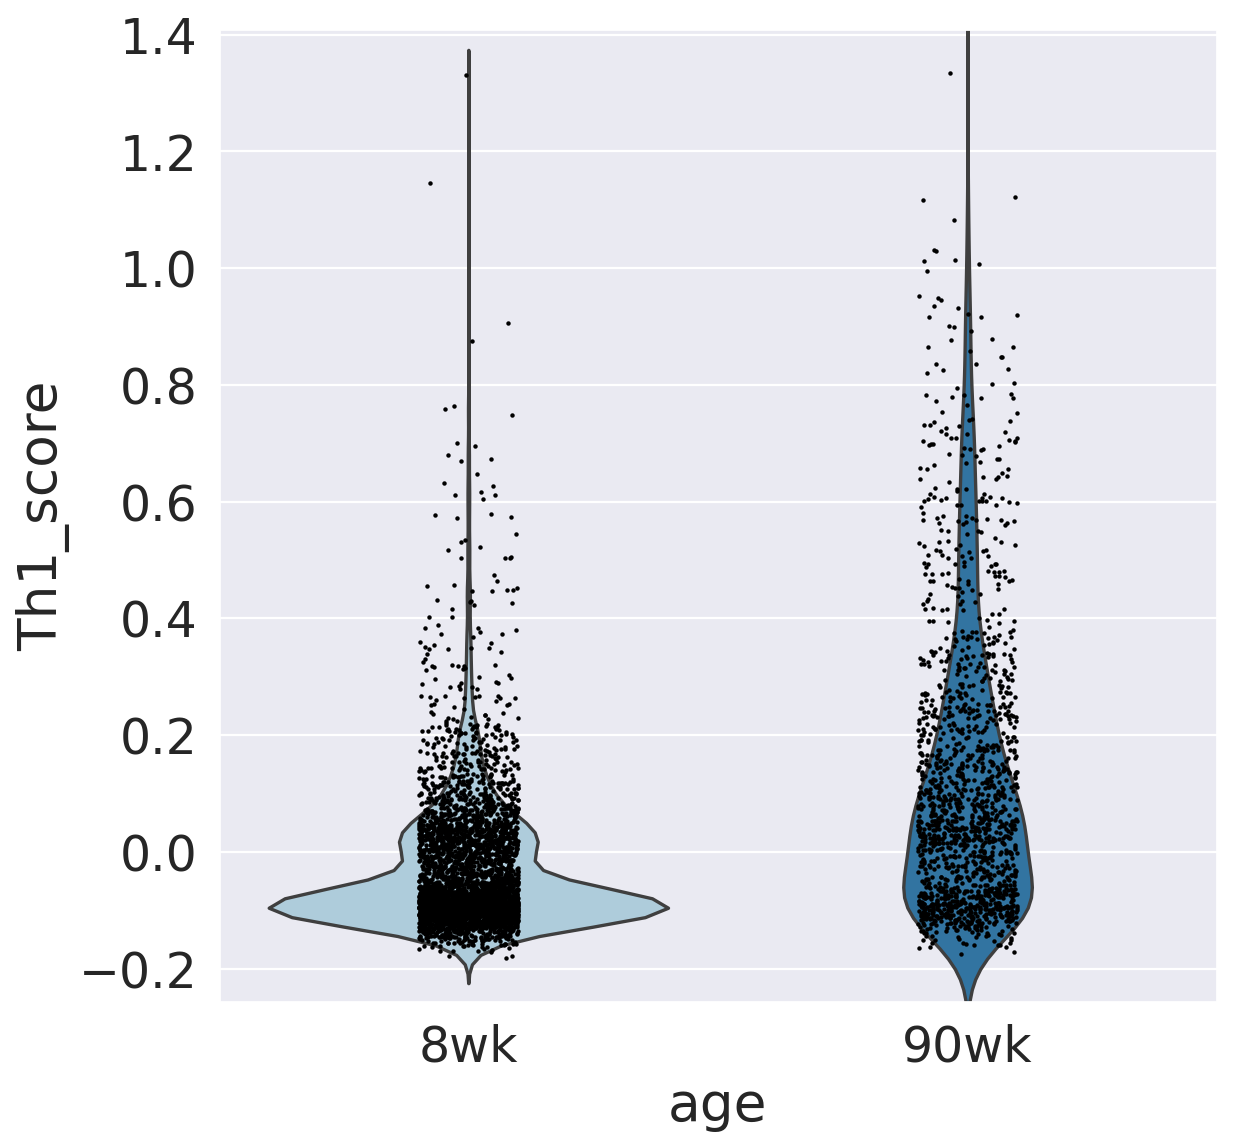

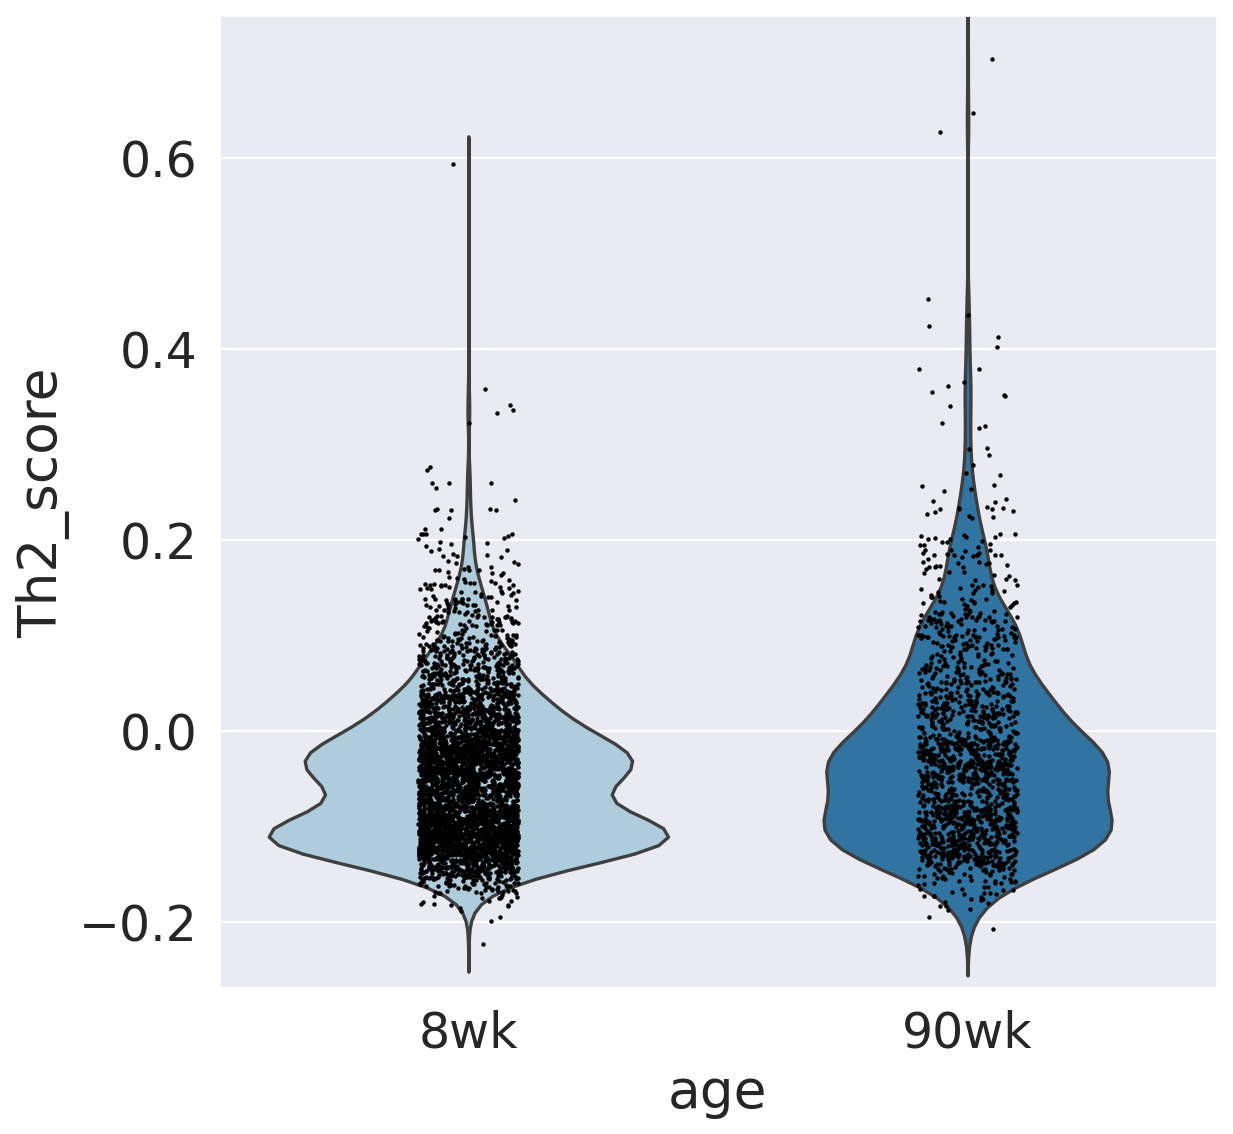

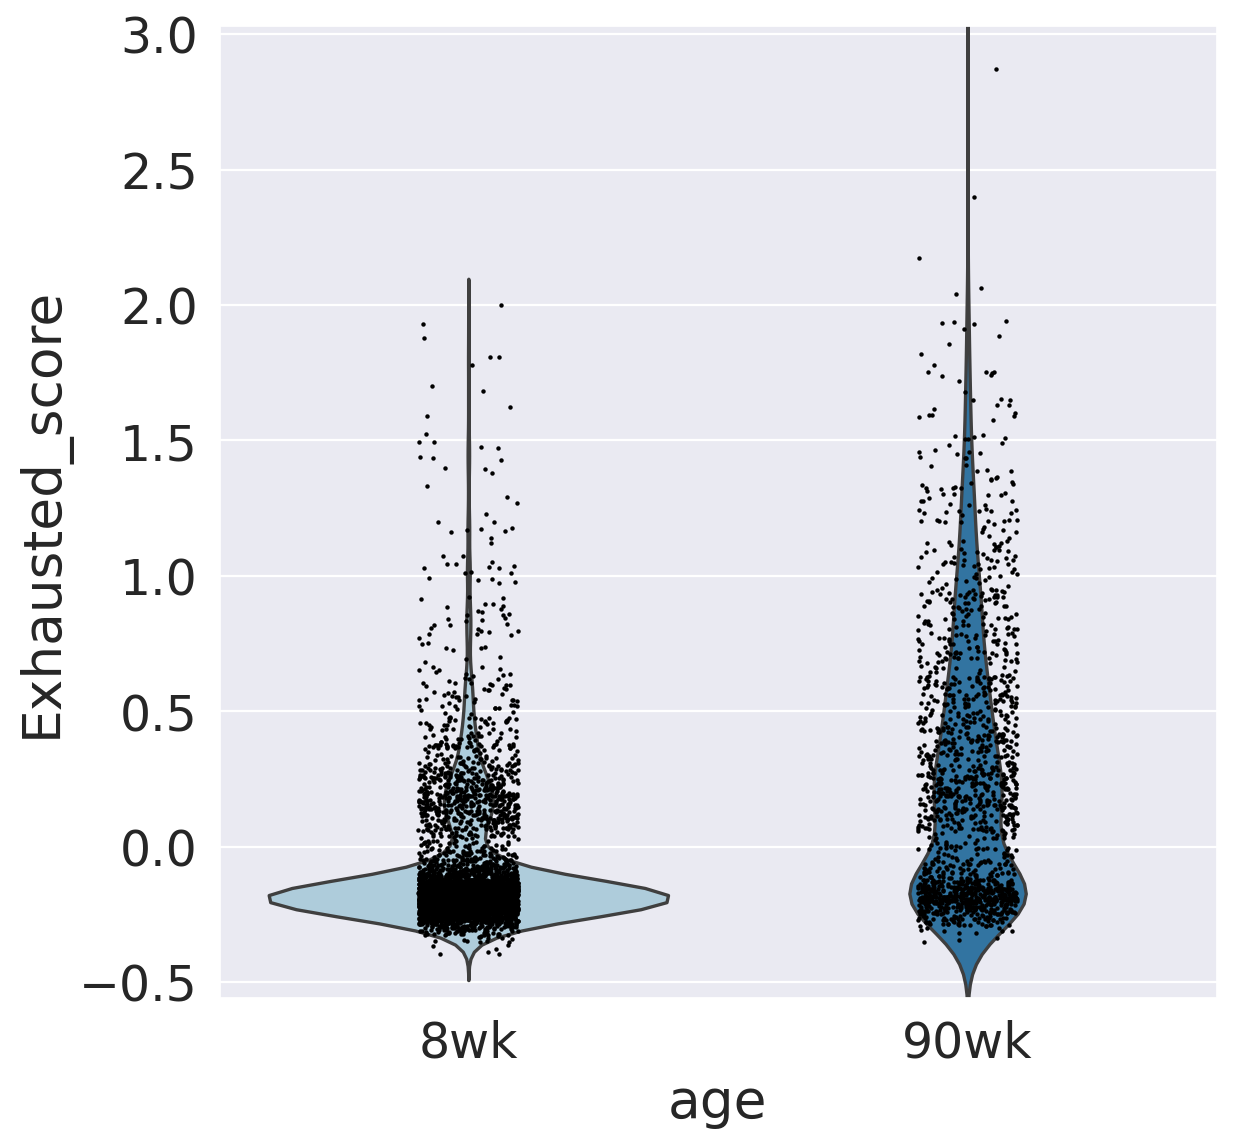

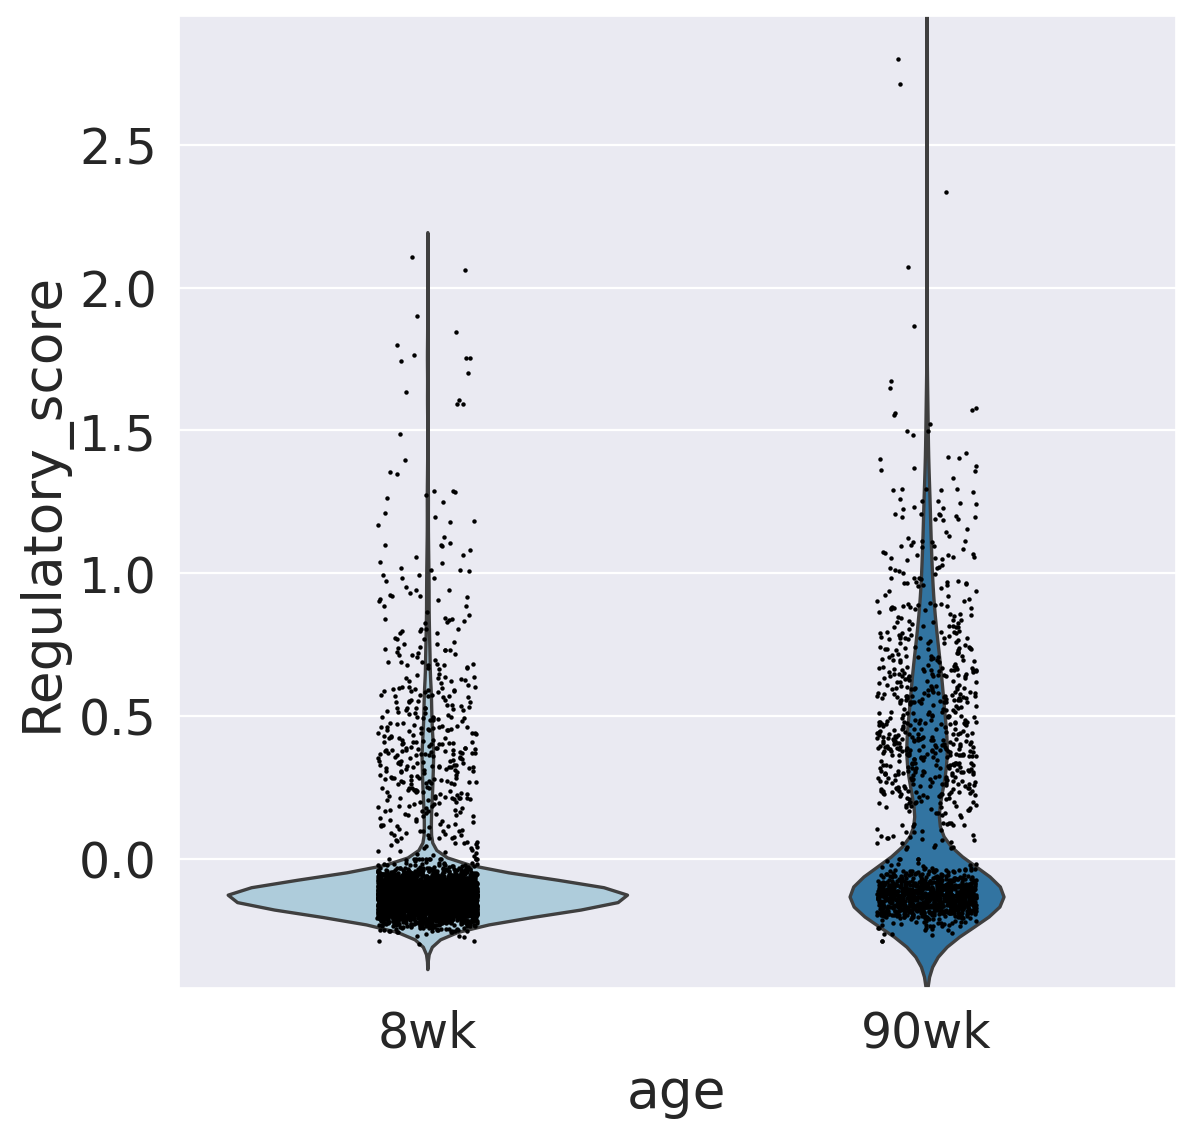

In [33]:
mpl.rcParams.update({"axes.grid" : False})
mpl.rcParams.update({'font.size': 38})
sc.settings.set_figure_params(dpi=200, frameon=False, vector_friendly=False)
sc.set_figure_params(dpi_save=200)
sc.set_figure_params(figsize=(8, 8))
%matplotlib inline
%config InlineBackend.figure_format='retina'

adata = sc.read_h5ad("./adatas/crmulti_gex_tcells.h5ad")
temp = adata[adata.obs['leiden_based_cts']=='CD4+ T cells']
temp = temp[temp.obs['treatment']=='OVAposLPSposPGPC']
df = pd.read_csv('tcellstate_genes.csv')
scorenames = []
for i in df.columns:
    name = str(i)+"_score"
    genes = df[i].tolist()
    genes = [i for i in genes if str(i)!='nan']
    sc.tl.score_genes(temp, np.unique(genes), ctrl_size=50, n_bins=25, score_name=name, random_state=23)
    scorenames.append(name)

for score in scorenames:
    fig = plt.figure()
    sns.set(font_scale = 2)
    sns.violinplot(temp.obs, y=score, x='age',scale='area',inner=None,palette=sns.color_palette("Paired"))
    sns.stripplot(temp.obs, y=score, x='age',jitter=True,size=2, color='black')
    plt.savefig('./figures/violin_{}.pdf'.format(score),dpi=650,bbox_inches='tight')

# Make adata for DeSeq2 Analysis

In [19]:
adata = sc.read_h5ad("./adatas/crmulti_gex_tcells.h5ad")
adata.uns['log1p']['base'] = None

In [20]:
adata.obs.groupby(by=['leiden_based_cts', 'age', 'treatment']).size()

leiden_based_cts      age   treatment       
CD4+ T cells          8wk   OVAposLPSposPGPC    4112
                            OVAposPBS           5968
                            PBS                 5904
                      90wk  OVAposLPSposPGPC    1572
                            OVAposPBS           2378
                            PBS                 1976
CD8+ T cells          8wk   OVAposLPSposPGPC    4819
                            OVAposPBS           4636
                            PBS                 8636
                      90wk  OVAposLPSposPGPC    4357
                            OVAposPBS           5244
                            PBS                 5842
Cycling CD8+ T cells  8wk   OVAposLPSposPGPC      84
                            OVAposPBS             52
                            PBS                   62
                      90wk  OVAposLPSposPGPC     223
                            OVAposPBS            142
                            PBS                  527
L

In [21]:
cd4 = adata[adata.obs['leiden_based_cts']=='Cd4+ T cells']
cd4pbs = cd4[cd4.obs['treatment']=='PBS']
cd4ovalpspgpc = cd4[cd4.obs['treatment']=='OVAposLPSposPGPC']
cd4_90 = cd4[cd4.obs['age']=='90wk']
cd4_90 = cd4_90[cd4_90.obs['treatment']!='PBS']

# cd4pbs.write_h5ad("./adatas/graph1_cd4.h5ad")
# cd4ovalpspgpc.write_h5ad("./adatas/graph2_cd4.h5ad")

In [22]:
adata.obs.treatment.value_counts()

PBS                 27295
OVAposPBS           22300
OVAposLPSposPGPC    18907
Name: treatment, dtype: int64